In [1]:
import os
import gc
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import PIL
from PIL import ImageDraw

In [3]:
import cv2
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image

In [4]:
DATA_PATH = 'E:/coding/Stanford Cars Dataset/car_data/car_data'
os.listdir(DATA_PATH)

['class.csv',
 'sample_submission.csv',
 'sample_submission2.csv',
 'test',
 'test.csv',
 'test_crop',
 'test_crop.zip',
 'test_dj',
 'test_dj.csv',
 'test_폴더',
 'train',
 'train.csv',
 'train_crop',
 'train_crop.zip',
 'train_폴더']

In [5]:
# 이미지 폴더 경로
TRAIN_IMG_PATH = os.path.join(DATA_PATH, 'train')
TEST_IMG_PATH = os.path.join(DATA_PATH, 'test')

# CSV 파일 경로
df_train = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))
df_test = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'))
df_class = pd.read_csv(os.path.join(DATA_PATH, 'class.csv'))

# IMG_SIZE
img_size = (224, 224)

In [6]:
N_TEST = os.path.join(DATA_PATH, 'test_dj')
n_test = pd.read_csv(os.path.join(DATA_PATH, 'test_dj.csv'))

In [7]:
n_test.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2
0,001.jpg,75,75,952,550
1,002.jpg,40,60,1220,810
2,003.jpg,50,10,650,490
3,004.jpg,60,75,600,470
4,005.jpg,70,125,640,430


In [8]:
## 박스 처리

def draw_rect(drawcontext, pos, outline=None, width=0):
    (x1, y1) = (pos[0], pos[1])
    (x2, y2) = (pos[2], pos[3])
    points = (x1, y1), (x2, y1), (x2, y2), (x1, y2), (x1, y1)
    drawcontext.line(points, fill=outline, width=width)

In [9]:
## test data 바운딩 처리

def make_boxing(img_name) :
    PATH = N_TEST
    data = n_test

    img = PIL.Image.open(os.path.join(PATH, img_name))
    pos = data.loc[data["img_file"] == img_name, \
                   ['bbox_x1','bbox_y1', 'bbox_x2', 'bbox_y2']].values.reshape(-1)
    draw = ImageDraw.Draw(img)
    draw_rect(draw, pos, outline='red', width=10)
    
    return img

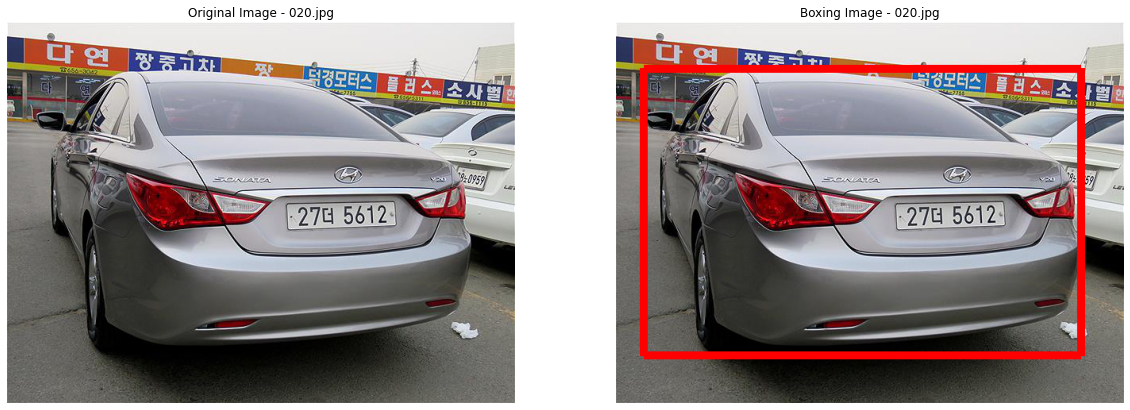

In [15]:
n_test = pd.read_csv(os.path.join(DATA_PATH, 'test_dj.csv'))
## 확인하고 싶은 이미지 번호 입력
f_name = "020.jpg"

plt.figure(figsize=(20,10))

## 원본 이미지
plt.subplot(1, 2, 1)
origin_img = PIL.Image.open(os.path.join(N_TEST, f_name))
plt.title("Original Image - {}".format(f_name))
plt.imshow(origin_img)
plt.axis('off')

## Bounding Box 처리 된 이미지
plt.subplot(1, 2, 2)
boxing = make_boxing(f_name)
plt.title("Boxing Image - {}".format(f_name))
plt.imshow(boxing)
plt.axis('off')

plt.show()

In [11]:
img_test = cv2.imread('E:/coding/Stanford Cars Dataset/car_data/car_data/test_dj/' + f_name)

print(type(img_test))
print(img_test.shape)
print(type(img_test.shape))

<class 'numpy.ndarray'>
(853, 1280, 3)
<class 'tuple'>


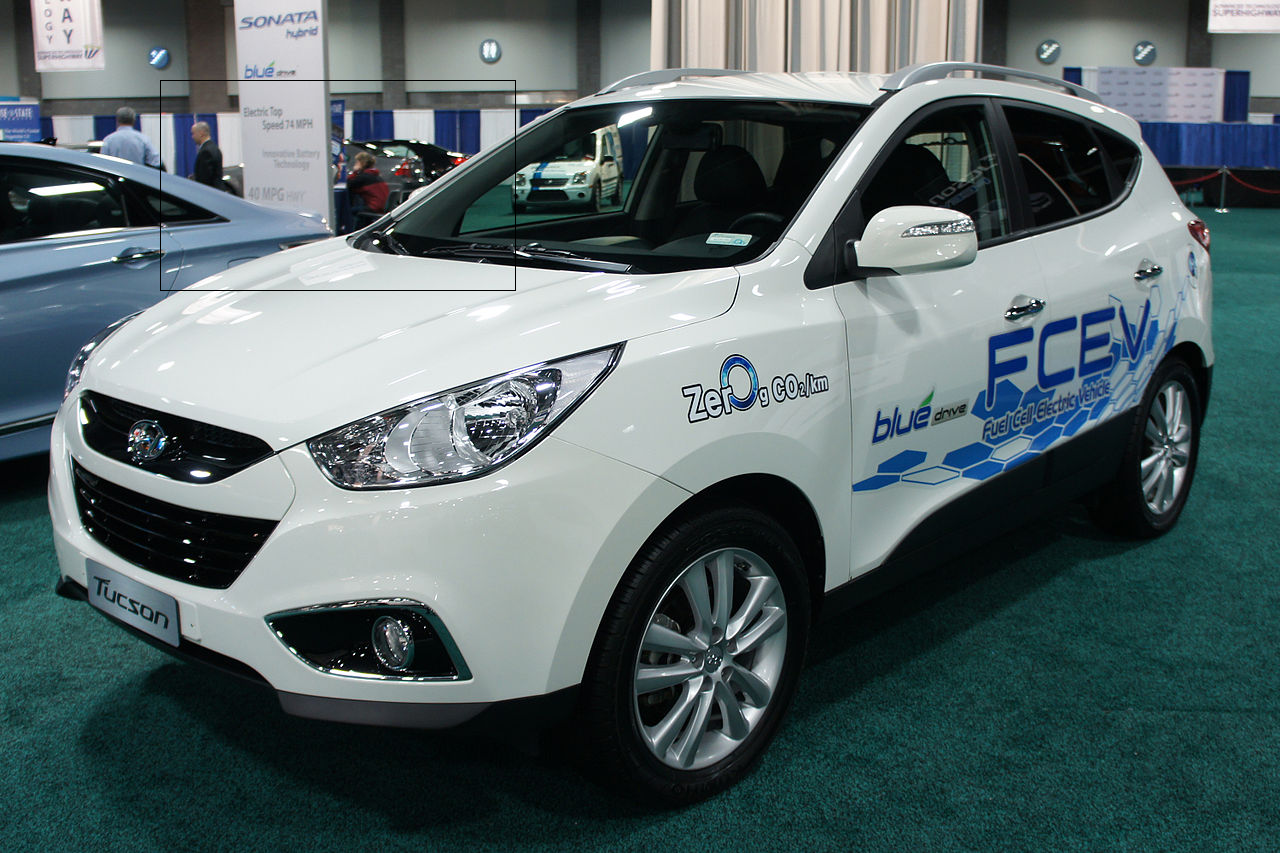

In [12]:
load_img = image.load_img('E:/coding/Stanford Cars Dataset/car_data/car_data/test_dj/' + f_name)

draw = ImageDraw.Draw(load_img)

draw.rectangle(( 160, 80, 515, 290 ), outline=(0, 0, 0))

load_img